# Final Project - Sales dataset

In this kernel, we use the `predict_future_sales` dataset to do some Descriptive Analysis.

1. How many items are there in list 1? in list 2? in only list 1 (List the name of them)? in only list 2 (List the name of them)? in both of the two lists (List the name of them)? Create the new csv file only contains the unique items from the two lists? (Name that file as `items.csv`)

In [1]:
import pandas as pd

In [2]:
list_1 = pd.read_csv('predict_future_sales/predict_future_sales/items_list_1.csv')
list_1

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
13785,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
13786,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
13787,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
13788,Яйцо для Little Inu,22168,62


In [3]:
list_2 = pd.read_csv('predict_future_sales/predict_future_sales/items_list_2.csv')
list_2

,item_name,item_id,item_category_id
0,"1С:Биологический конструктор 1.5 [PC, Цифровая...",470,78
1,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,471,49
2,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,472,49
3,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,473,49
4,1С:Бухгалтерия 8 КОРП: учет в головной организ...,474,49
...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37
13744,Я-ЛЕГЕНДА WB (регион),22147,40
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


In [4]:
print("There are " + str(len(list_1)) + " items in list 1.")
print("There are " + str(len(list_2)) + " items in list 2.")

There are 13790 items in list 1.
There are 13748 items in list 2.


In [5]:
list_merge = pd.merge(list_1, list_2, how='outer', on = 'item_id', indicator = True)
list_merge

,item_name_x,item_id,item_category_id_x,item_name_y,item_category_id_y,_merge
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40.0,NaN,NaN,left_only
1,!ABBYY FineReader 12 Professional Edition Full...,1,76.0,NaN,NaN,left_only
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40.0,NaN,NaN,left_only
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40.0,NaN,NaN,left_only
4,***КОРОБКА (СТЕКЛО) D,4,40.0,NaN,NaN,left_only
...,...,...,...,...,...,...
22165,NaN,22146,NaN,Я-ЛЕГЕНДА WB (BD),37.0,right_only
22166,NaN,22147,NaN,Я-ЛЕГЕНДА WB (регион),40.0,right_only
22167,NaN,22148,NaN,Я-ЧЕТВЕРТЫЙ WD,40.0,right_only
22168,NaN,22149,NaN,Я-ЧЕТВЕРТЫЙ WD (регион),40.0,right_only


In [6]:
list_merge['_merge'].value_counts() 

left_only     8422
right_only    8380
both          5368
Name: _merge, dtype: int64

In [7]:
items_in_both_lists = list_merge[list_merge._merge == "both"]
items_in_both_lists

,item_name_x,item_id,item_category_id_x,item_name_y,item_category_id_y,_merge
470,"1С:Биологический конструктор 1.5 [PC, Цифровая...",470,78.0,"1С:Биологический конструктор 1.5 [PC, Цифровая...",78.0,both
471,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,471,49.0,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49.0,both
472,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,472,49.0,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49.0,both
473,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,473,49.0,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49.0,both
474,"1С:Школа. Химия, 8 кл.",920,77.0,"1С:Школа. Химия, 8 кл.",77.0,both
...,...,...,...,...,...,...
13766,Футболка Minecraft Powered by Redstone черная S,21183,61.0,Футболка Minecraft Powered by Redstone черная S,61.0,both
13767,Футболка Minecraft Run Away черная L,21184,61.0,Футболка Minecraft Run Away черная L,61.0,both
13768,Футболка Minecraft Run Away черная M,21185,61.0,Футболка Minecraft Run Away черная M,61.0,both
13769,Футболка Minecraft Run Away черная S,21186,61.0,Футболка Minecraft Run Away черная S,61.0,both


In [8]:
print("There are " + str(len(items_in_both_lists)) + " items in both lists.")

There are 5368 items in both lists.


In [9]:
items = pd.concat([list_1,list_2])
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37
13744,Я-ЛЕГЕНДА WB (регион),22147,40
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


In [10]:
items_df = items.drop_duplicates('item_id')
items_df.to_csv('items.csv',index=False)
items_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37
13744,Я-ЛЕГЕНДА WB (регион),22147,40
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


2. How many items are there in the `items.csv`? How many of them contain digits in name? How many of them are FIFA football game items (contain "FIFA" in the name)?

In [11]:
print("There are " + str(len(items_df)) + " items in the items.csv.")

There are 22170 items in the items.csv.


In [12]:
def check_digits_in_name(name):
    for cha in name:
        if cha.isdigit():
            return True
    return False

In [13]:
items_df['digits_in_name'] = items_df.item_name.apply(check_digits_in_name)
items_df

C:\Users\Admin\AppData\Local\Temp/ipykernel_5020/4221770549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['digits_in_name'] = items_df.item_name.apply(check_digits_in_name)


,item_name,item_id,item_category_id,digits_in_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,False
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,True
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,False
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,False
4,***КОРОБКА (СТЕКЛО) D,4,40,False
...,...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37,False
13744,Я-ЛЕГЕНДА WB (регион),22147,40,False
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40,False
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40,False


In [14]:
def check_FIFA_in_name(name):
    if 'FIFA' in name.upper():
        return True
    return False

In [15]:
items_df['FIFA_in_name'] = items_df.item_name.apply(check_FIFA_in_name)
items_df

C:\Users\Admin\AppData\Local\Temp/ipykernel_5020/644242636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['FIFA_in_name'] = items_df.item_name.apply(check_FIFA_in_name)


,item_name,item_id,item_category_id,digits_in_name,FIFA_in_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,False,False
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,True,False
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,False,False
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,False,False
4,***КОРОБКА (СТЕКЛО) D,4,40,False,False
...,...,...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37,False,False
13744,Я-ЛЕГЕНДА WB (регион),22147,40,False,False
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40,False,False
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40,False,False


In [16]:
items_have_digits_in_name = items_df[items_df.digits_in_name == True]
items_have_fifa_in_name = items_df[items_df.FIFA_in_name == True]

In [17]:
print("There are " + str(len(items_have_digits_in_name)) + " items contain digits in name.")
print("There are " + str(len(items_have_fifa_in_name)) + " items contain FIFA in name.")

There are 11158 items contain digits in name.
There are 79 items contain FIFA in name.


3. How many item categories are there in the dataset? Which item category contain highest number of items? lowest number of items? List all items according to each item category. Calculate the average number of items in each category.

In [18]:
categories_df = pd.read_csv('predict_future_sales/predict_future_sales/item_categories.csv')
categories_df

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [19]:
print("There are " + str(len(categories_df)) + " item categories in the dataset")

There are 84 item categories in the dataset


In [20]:
items_df = items_df.drop(columns=['digits_in_name','FIFA_in_name'])
items_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
13743,Я-ЛЕГЕНДА WB (BD),22146,37
13744,Я-ЛЕГЕНДА WB (регион),22147,40
13745,Я-ЧЕТВЕРТЫЙ WD,22148,40
13746,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


In [21]:
item_category_df = items_df.groupby(by='item_category_id').agg({'item_name': list, 'item_id': list}).reset_index()
item_category_df

,item_category_id,item_name,item_id
0,0,"[Наушники PHILIPS SBC HC8680, Наушники RITMIX ...","[16255, 16256, 16257, 5441]"
1,1,[PS2: Карта памяти 8 Мб черная (Memory Card 8M...,"[5606, 5740]"
2,2,[Thrustmaster. F1 Wireless Gamepad Ferrari 150...,"[7009, 7153, 7154, 13069, 13070, 13411, 13414,..."
3,3,[Кабель универсальный HDMI Artplays 2 м (ver. ...,"[13071, 5652, 5653, 5654, 5655, 5656, 5657, 56..."
4,4,[Black Horns PSP Slim Джинсовый чехол серый (B...,"[1955, 1956, 1957, 1958, 3111, 13101, 13102, 3..."
...,...,...,...
79,79,[Прием денежных средств для 1С-Онлайн],[17717]
80,80,"[Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) ...","[9244, 9246, 9248, 9250, 9252, 9254]"
81,81,[Компактдиск Mirex CD-R printable inkjet 48x C...,"[13346, 13347, 13349, 13352, 13355, 13356, 13358]"
82,82,[Компактдиск Mirex CD-R 700 Мб 48x Slim case P...,"[13344, 13345, 13348, 13350, 13351, 13353, 133..."


In [23]:
item_category_df['num_of_items'] = item_category_df.item_id.apply(len)
item_category_df

,item_category_id,item_name,item_id,num_of_items
0,0,"[Наушники PHILIPS SBC HC8680, Наушники RITMIX ...","[16255, 16256, 16257, 5441]",4
1,1,[PS2: Карта памяти 8 Мб черная (Memory Card 8M...,"[5606, 5740]",2
2,2,[Thrustmaster. F1 Wireless Gamepad Ferrari 150...,"[7009, 7153, 7154, 13069, 13070, 13411, 13414,...",75
3,3,[Кабель универсальный HDMI Artplays 2 м (ver. ...,"[13071, 5652, 5653, 5654, 5655, 5656, 5657, 56...",34
4,4,[Black Horns PSP Slim Джинсовый чехол серый (B...,"[1955, 1956, 1957, 1958, 3111, 13101, 13102, 3...",15
...,...,...,...,...
79,79,[Прием денежных средств для 1С-Онлайн],[17717],1
80,80,"[Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) ...","[9244, 9246, 9248, 9250, 9252, 9254]",6
81,81,[Компактдиск Mirex CD-R printable inkjet 48x C...,"[13346, 13347, 13349, 13352, 13355, 13356, 13358]",7
82,82,[Компактдиск Mirex CD-R 700 Мб 48x Slim case P...,"[13344, 13345, 13348, 13350, 13351, 13353, 133...",8


In [24]:
import numpy as np

In [25]:
avg_num_of_items = np.average(item_category_df.num_of_items)
print("The average number of items in each category is: " + str(round(avg_num_of_items, 0)))

The average number of items in each category is: 264.0


In [27]:
max_num_of_items = item_category_df.loc[item_category_df.num_of_items == np.max(item_category_df.num_of_items)]
max_num_of_items

,item_category_id,item_name,item_id,num_of_items
40,40,"[! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D, **...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",5035


In [29]:
categories_df[categories_df.item_category_id == 40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [31]:
print("The item category contains the highest number of items is Кино - DVD with 5035 items.")

The item category contains the highest number of items is Кино - DVD with 5035 items.


In [32]:
min_num_of_items = item_category_df.loc[item_category_df.num_of_items == np.min(item_category_df.num_of_items)]
min_num_of_items

,item_category_id,item_name,item_id,num_of_items
10,10,[Sony PlayStation 2 (SCPH-77008)],[6669],1
51,51,[Правила дорожного движения 2009. Новейшая мет...,[17703],1
79,79,[Прием денежных средств для 1С-Онлайн],[17717],1


In [33]:
merge_min_item_cat_df = pd.merge(min_num_of_items,categories_df, how = 'left', on = 'item_category_id')
merge_min_item_cat_df

,item_category_id,item_name,item_id,num_of_items,item_category_name
0,10,[Sony PlayStation 2 (SCPH-77008)],[6669],1,Игровые консоли - PS2
1,51,[Правила дорожного движения 2009. Новейшая мет...,[17703],1,Книги - Познавательная литература
2,79,[Прием денежных средств для 1С-Онлайн],[17717],1,Служебные


In [35]:
print("The lowest number of items is 1. There are 3 item categories have 1 items. They are Игровые консоли - PS2, Книги - Познавательная литература, and Служебные.")

The lowest number of items is 1. There are 3 item categories have 1 items. They are Игровые консоли - PS2, Книги - Познавательная литература, and Служебные.


4. Which item has the highest price in each year? Which item has the lowest price in each year? Calculate the average price of each item in each year?

In [36]:
sales_df = pd.read_csv('predict_future_sales/predict_future_sales/sales.csv')
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [37]:
sales_items_df = pd.merge(sales_df, items_df, how = 'left', on = 'item_id' )
sales_items_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [38]:
sales_items_df.date = sales_items_df.date.apply(lambda x: x.split('.')[-1])
sales_items_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [39]:
year_list = sales_items_df.date.unique()
year_list

array(['2013', '2014', '2015'], dtype=object)

In [40]:
def find_highest_lowest_price(df, year):
    sales_year_df = df[df.date == year]
    highest_price_df = sales_year_df[sales_year_df.item_price == np.max(sales_year_df.item_price)]
    lowest_price_df = sales_year_df[sales_year_df.item_price == np.min(sales_year_df.item_price)]
    average_price = np.average(sales_year_df.item_price)
    return highest_price_df, lowest_price_df, average_price

In [45]:
for year in year_list:
    print(year)
    highest_price_df, lowest_price_df, average_price = find_highest_lowest_price(sales_items_df, year)
    print('\n')
    print('highest_price_df:')
    print(highest_price_df)
    print('\n')
    print('lowest_price_df:')
    print(lowest_price_df)
    print('\n')
    print('average_price:')
    print(average_price)
    print('\n')

2013


highest_price_df:
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
1163158  2013              11       12     6066    307980.0           1.0   

                    item_name  item_category_id  
1163158  Radmin 3  - 522 лиц.                75  


lowest_price_df:
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
484683  2013               4       32     2973        -1.0           1.0   

                                        item_name  item_category_id  
484683  DmC Devil May Cry [PS3, русские субтитры]                19  


average_price:
726.7978012088067


2014


highest_price_df:
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
1488135  2014              14       25    13199     50999.0           1.0   

                                       item_name  item_category_id  
1488135  Коллекционные шахматы (Властелин Колец)                69  


lowest_price_df:
         date  date_block_num  sho

5. Which item has the highest sales in each year? Which item has the lowest sales in each year? Calculate the average sales of each item in each year?

In [46]:
sales_items_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [47]:
def find_highest_lowest_sales(df, year):
    sales_year_df = df[df.date == year]
    grouped_sales_year_df = sales_year_df.groupby(by='item_id').agg({'item_cnt_day': sum}).reset_index()
    highest_sales_df = grouped_sales_year_df[grouped_sales_year_df.item_cnt_day == np.max(grouped_sales_year_df.item_cnt_day)]
    lowest_sales_df = grouped_sales_year_df[grouped_sales_year_df.item_cnt_day == np.min(grouped_sales_year_df.item_cnt_day)]
    average_sales = np.average(grouped_sales_year_df.item_cnt_day)
    return highest_sales_df, lowest_sales_df, average_sales

In [49]:
for year in year_list:
    print(year)
    print('\n')
    highest_sales_df, lowest_sales_df, average_sales = find_highest_lowest_sales(sales_items_df, year)
    print('highest_sales_df \n', highest_sales_df)
    print('\n')
    print('lowest_sales_df \n', lowest_sales_df)
    print('\n')
    print('average_sales \n', average_sales)
    print('\n')

2013


highest_sales_df 
        item_id  item_cnt_day
14203    20949       63748.0


lowest_sales_df 
      item_id  item_cnt_day
913     1590         -11.0


average_sales 
 104.3840090842295


2014


highest_sales_df 
        item_id  item_cnt_day
13410    20949       85288.0


lowest_sales_df 
       item_id  item_cnt_day
7171    11367          -5.0


average_sales 
 93.62694924865325


2015


highest_sales_df 
        item_id  item_cnt_day
10617    20949       38606.0


lowest_sales_df 
       item_id  item_cnt_day
3672     7048          -1.0
4714     9242          -1.0
6803    13466          -1.0
7582    15018          -1.0


average_sales 
 67.9690639167926




6. Which shop has the highest sales in each year? Which shop has the lowest sales in each year? 

In [51]:
shops_df = pd.read_csv('predict_future_sales/predict_future_sales/shops.csv')
shops_df

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [55]:
merge_shop_sales_df = pd.merge(sales_df, shops_df, how='left', on='shop_id')
merge_shop_sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум"""


In [56]:
merge_shop_sales_df.date = merge_shop_sales_df.date.apply(lambda x: x.split('.')[-1])
merge_shop_sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум"""
2935845,2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум"""
2935846,2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум"""
2935847,2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум"""


In [58]:
grouped_shop_sales_df = merge_shop_sales_df.groupby(by=['shop_id', 'shop_name', 'date']).agg({'item_cnt_day': sum}).reset_index()
grouped_shop_sales_df

,shop_id,shop_name,date,item_cnt_day
0,0,"!Якутск Орджоникидзе, 56 фран",2013,11705.0
1,1,"!Якутск ТЦ ""Центральный"" фран",2013,6311.0
2,2,"Адыгея ТЦ ""Мега""",2013,9961.0
3,2,"Адыгея ТЦ ""Мега""",2014,12221.0
4,2,"Адыгея ТЦ ""Мега""",2015,8438.0
...,...,...,...,...
154,58,"Якутск ТЦ ""Центральный""",2014,31490.0
155,58,"Якутск ТЦ ""Центральный""",2015,18072.0
156,59,"Ярославль ТЦ ""Альтаир""",2013,22308.0
157,59,"Ярославль ТЦ ""Альтаир""",2014,16194.0


In [59]:
def find_highest_lowest_shop_sales(df, year):
    shop_sales_year_df = df[df.date == year]
    highest_shop_sales_df = shop_sales_year_df[shop_sales_year_df.item_cnt_day == np.max(shop_sales_year_df.item_cnt_day)]
    lowest_shop_sales_df = shop_sales_year_df[shop_sales_year_df.item_cnt_day == np.min(shop_sales_year_df.item_cnt_day)]
    return highest_shop_sales_df, lowest_shop_sales_df
    

In [60]:
for year in year_list:
    print(year)
    print('\n')
    highest_shop_sales_df, lowest_shop_sales_df = find_highest_lowest_shop_sales(grouped_shop_sales_df, year)
    print('highest_shop_sales_df \n', highest_shop_sales_df)
    print('\n')
    print('lowest_shop_sales_df \n', lowest_shop_sales_df)
    print('\n')

2013


highest_shop_sales_df 
     shop_id                shop_name  date  item_cnt_day
81       31  Москва ТЦ "Семеновский"  2013      132487.0


lowest_shop_sales_df 
      shop_id              shop_name  date  item_cnt_day
126       49  Тюмень ТРЦ "Кристалл"  2013         197.0


2014


highest_shop_sales_df 
     shop_id                shop_name  date  item_cnt_day
82       31  Москва ТЦ "Семеновский"  2014      110631.0


lowest_shop_sales_df 
     shop_id             shop_name  date  item_cnt_day
87       34  Н.Новгород ТРЦ "РИО"  2014        2192.0


2015


highest_shop_sales_df 
     shop_id                shop_name  date  item_cnt_day
83       31  Москва ТЦ "Семеновский"  2015       67659.0


lowest_shop_sales_df 
     shop_id                              shop_name  date  item_cnt_day
92       36  Новосибирск ТРЦ "Галерея Новосибирск"  2015         330.0




7. Use one combo figure with bar plot and line plot to show the total sales and turnover over 33 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [61]:
import matplotlib.pyplot as plt

In [62]:
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [64]:
sales_df.date = sales_df.date.apply(lambda x: x.split('.')[-1])
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013,0,59,22154,999.00,1.0
1,2013,0,25,2552,899.00,1.0
2,2013,0,25,2552,899.00,-1.0
3,2013,0,25,2554,1709.05,1.0
4,2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0
2935845,2015,33,25,7460,299.00,1.0
2935846,2015,33,25,7459,349.00,1.0
2935847,2015,33,25,7440,299.00,1.0


In [97]:
sales_df['turnover'] = sales_df['item_price'] * sales_df['item_cnt_day']
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,turnover
0,2013,0,59,22154,999.00,1.0,999.00
1,2013,0,25,2552,899.00,1.0,899.00
2,2013,0,25,2552,899.00,-1.0,-899.00
3,2013,0,25,2554,1709.05,1.0,1709.05
4,2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0,299.00
2935845,2015,33,25,7460,299.00,1.0,299.00
2935846,2015,33,25,7459,349.00,1.0,349.00
2935847,2015,33,25,7440,299.00,1.0,299.00


In [104]:
total_turnover_df = sales_df.groupby(by=['date_block_num']).agg({'item_cnt_day':sum, 'turnover': sum}).reset_index()
total_turnover_df

,date_block_num,item_cnt_day,turnover
0,0,131479.0,9.194709e+07
1,1,128090.0,9.066571e+07
2,2,147142.0,1.049327e+08
3,3,107190.0,6.915429e+07
4,4,106970.0,6.506531e+07
5,5,125381.0,7.955041e+07
6,6,116966.0,6.935060e+07
7,7,125291.0,7.429797e+07
8,8,133332.0,1.190819e+08
9,9,127541.0,1.072416e+08


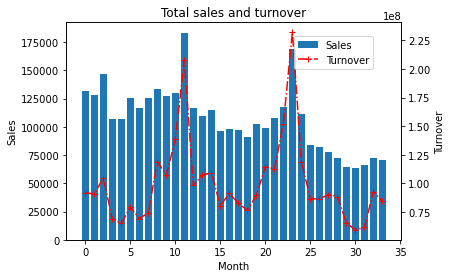

In [111]:
fig, ax_1 = plt.subplots()
ax_1.bar(total_turnover_df.date_block_num, total_turnover_df.item_cnt_day, label='Sales')
ax_1.set_ylabel('Sales')
ax_1.set_xlabel('Month')

ax_2 = ax_1.twinx()
ax_2.plot(total_turnover_df.date_block_num, total_turnover_df.turnover, '+-.r', label='Turnover')
ax_2.set_ylabel('Turnover')

fig.legend(loc=(0.65, 0.75))
plt.title(f'Total sales and turnover')
plt.show()

Overall, the total sales and turnover gradually reduced over 33 given months.</p>
However, we see 2 months in which total sales and turnover were unusually high, they are month 11 (December 2013) and month 23 ((December 2014), both are December.


8. Randomly choose 3 shops, use one line plot figure to show the total turnover of them each month over 33 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [116]:
np.random.seed(1)
random_shop_id = np.random.choice(sales_df.shop_id.unique(), size=3)
random_shop_id

array([52, 46,  4], dtype=int64)

In [117]:
random_shop_df = sales_df.loc[np.isin(sales_df.shop_id, random_shop_id)]
random_shop_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,turnover
30072,2013,0,4,5605,489.3,1.0,489.3
30073,2013,0,4,5587,199.0,1.0,199.0
30074,2013,0,4,5588,149.0,1.0,149.0
30075,2013,0,4,5613,6190.0,1.0,6190.0
30076,2013,0,4,5627,2390.0,1.0,2390.0
...,...,...,...,...,...,...,...
2918122,2015,33,4,1586,5999.0,1.0,5999.0
2918123,2015,33,4,1523,799.0,1.0,799.0
2918124,2015,33,4,1535,1999.0,1.0,1999.0
2918125,2015,33,4,1325,449.0,1.0,449.0


In [122]:
turover_random_shop_df = random_shop_df.groupby(by=['shop_id', 'date_block_num']).agg({'turnover': sum}).reset_index()
turover_random_shop_df = turover_random_shop_df.groupby(by='shop_id').agg({'date_block_num': list,'turnover': list}).reset_index()
turover_random_shop_df

,shop_id,date_block_num,turnover
0,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1433666.0, 1532114.99999998, 1415445.49999999..."
1,46,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2358347.999999995, 2021670.099999932, 2198033..."
2,52,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1160182.999999999, 1174198.030000049, 1260843..."


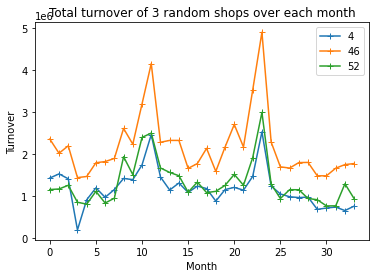

In [123]:
for index, row in turover_random_shop_df.iterrows():
    plt.plot(row.date_block_num, row.turnover, label=row.shop_id, marker='+')

plt.xlabel('Month')
plt.ylabel('Turnover')
plt.title('Total turnover of 3 random shops over each month')
plt.legend()
plt.show()